In [2]:
#Solution based on https://lazyprogrammer.me/machine-learning-data-science/

%tensorflow_version 2.x  # Colab only.
import tensorflow as tf
print(tf.__version__)

from os.path import join  
from google.colab import drive
ROOT = "/content/drive"  
drive.mount(ROOT) 
print("hello")
PROJECT_PATH = "/content/drive/My Drive/projects/MuseumBrickWallRecog/MuseumBrickWallRecog"
%cd {PROJECT_PATH}

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
hello
/content/drive/My Drive/projects/MuseumBrickWallRecog/MuseumBrickWallRecog


In [0]:
PROJECT_PATH = "/content/drive/My Drive/projects/MuseumBrickWallRecog/MuseumBrickWallRecog"

import glob
filelist = [f.split('/')[1] for f in glob.glob("blocks/*.png", recursive=False)]
rotationList = [0.0,90.0,180.0,270.0]


In [0]:
np.arange(0,10)

In [0]:
import numpy as np

#https://numpy.org/doc/1.17/reference/random/generated/numpy.random.Generator.choice.html
rng = np.random.default_rng()
shuffled = rng.permutation(np.arange(0,len(filelist)))
newlist = [filelist[i] for i in shuffled[:20]]

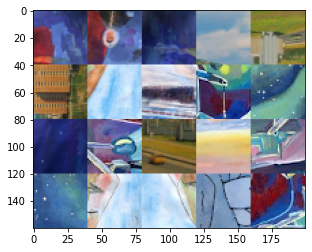

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

#https://note.nkmk.me/en/python-pillow-concat-images/
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def get_concat_v_series(imNamesList,rotationValsList):
    im0 = Image.open(PROJECT_PATH +"/blocks/"+imNamesList.pop(0))
    im0 = im0.rotate(rotationValsList.pop(0))
    for imName,angle in zip(imNamesList,rotationValsList):
        im = Image.open(PROJECT_PATH +"/blocks/"+imName)
        im0 = get_concat_v(im0, im.rotate(angle))
    return im0

def get_concat_h_series(imList):
    im0 = imList.pop(0)
    for im in imList:        
        im0 = get_concat_h(im0, im)
    return im0

def create_image(imNamesList,rotationValsList): 
    #pairs = [(n,a) for n,a in zip(imNamesList,rotationValsList)]
    #print(pairs,sep='bbbb')   
    imCol0 = get_concat_v_series(imNamesList[:4],rotationValsList[:4].tolist())
    imCol1 = get_concat_v_series(imNamesList[4:8],rotationValsList[4:8].tolist())
    imCol2 = get_concat_v_series(imNamesList[8:12],rotationValsList[8:12].tolist())
    imCol3 = get_concat_v_series(imNamesList[12:16],rotationValsList[12:16].tolist())
    imCol4 = get_concat_v_series(imNamesList[16:20],rotationValsList[16:20].tolist())
    return get_concat_h_series([imCol0,imCol1,imCol2,imCol3,imCol4])


plt.imshow(create_image(newlist,rng.choice(rotationList,20)))
#get_concat_h(im1, im1).save('data/dst/pillow_concat_h.jpg')
#get_concat_v(im1, im1).save('data/dst/pillow_concat_v.jpg')


In [0]:
#numerated blocks for each image (with borders grid and numbers printed above each block)
# => blocknums folder
from PIL import Image, ImageOps,ImageFont,ImageDraw
import matplotlib.pyplot as plt

numb = 0
fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 10)
class_names = ['fox', 'dck','bay', 'chu','alx', 'mrm']

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def get_concat_v_series(imNamesList,rotationValsList):
    global numb
    im0 = Image.open(PROJECT_PATH +"/blocks/"+imNamesList.pop(0))
    im0 = ImageOps.expand(im0, border=2)
    d = ImageDraw.Draw(im0)
    d.text((15,15), str(numb), fnt=fnt, fill=(255,0,0,255))
    numb += 1
    im0 = im0.rotate(rotationValsList.pop(0))
    for imName,angle in zip(imNamesList,rotationValsList):
        im = Image.open(PROJECT_PATH +"/blocks/"+imName)
        im = ImageOps.expand(im, border=3)
        d = ImageDraw.Draw(im)
        d.text((15,15), str(numb), fnt=fnt, fill=(255,0,0,255))
        numb += 1
        im0 = get_concat_v(im0, im.rotate(angle))
    return im0

def get_concat_h_series(imList):
    im0 = imList.pop(0)
    for im in imList:        
        im0 = get_concat_h(im0, im)
    return im0

def create_image(imNamesList,rotationValsList): 
    #pairs = [(n,a) for n,a in zip(imNamesList,rotationValsList)]
    #print(pairs,sep='bbbb')   
    imCol0 = get_concat_v_series(imNamesList[:4],rotationValsList[:4])
    imCol1 = get_concat_v_series(imNamesList[4:8],rotationValsList[4:8])
    imCol2 = get_concat_v_series(imNamesList[8:12],rotationValsList[8:12])
    imCol3 = get_concat_v_series(imNamesList[12:16],rotationValsList[12:16])
    imCol4 = get_concat_v_series(imNamesList[16:20],rotationValsList[16:20])
    return get_concat_h_series([imCol0,imCol1,imCol2,imCol3,imCol4])

for i in range(6):
  numb = 0
  create_image(filelist[i*20:i*20+20],[0.0] * (20)).save(PROJECT_PATH +"/blocknums/"+class_names[i]+'.png')

In [0]:
import numpy as np

def convert_image(im):   
    original_width, original_height = im.size
    np_image = np.array(im)
    new_image = np.zeros((np_image.shape[0], np_image.shape[1], 3)) 
    for each_channel in range(3):
        new_image[:,:,each_channel] = np_image[:,:,each_channel]  
      
    np_image = []
    return new_image

H_DIM = 160
W_DIM = 200


fox = Image.open(PROJECT_PATH +"/data/"+"fox.png")  # this could be a 4D array PNG (RGBA)
dck = Image.open(PROJECT_PATH +"/data/"+"dock.png")
bay = Image.open(PROJECT_PATH +"/data/"+"bay.png")
chu = Image.open(PROJECT_PATH +"/data/"+"chu.png")
alx = Image.open(PROJECT_PATH +"/data/"+"alesha.png")
mrm = Image.open(PROJECT_PATH +"/data/"+"murm.png")

fox = convert_image(fox)
dck = convert_image(dck)
bay = convert_image(bay)
chu = convert_image(chu)
alx = convert_image(alx)
mrm = convert_image(mrm)

H, W, C = fox.shape
class_data = [fox,dck,bay,chu,alx,mrm]
class_names = ['fox', 'dck','bay', 'chu','alx', 'mrm']

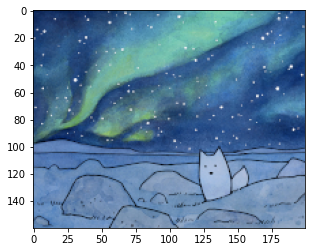

In [0]:
plt.imshow(fox/255.)

In [0]:
from matplotlib.patches import Rectangle
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy

def custom_loss(y_true, y_pred):
  # target is a 7-tuple
  # (fox,dck,bay,chu,alx,mrm, object_appeared)

  cce = categorical_crossentropy(y_true[:, :-1], y_pred[:, :-1]) # object class
  bce = binary_crossentropy(y_true[:, -1], y_pred[:, -1]) # object appeared
  return cce * y_true[:, -1] + 0.5 * bce

def make_model():
  vgg = tf.keras.applications.VGG16(
    input_shape=[H, W, 3],
    include_top=False,
    weights='imagenet')
  x = Flatten()(vgg.output)
  x0 = Dense(6, activation='softmax')(x) # object class
  x1 = Dense(1, activation='sigmoid')(x) # object appeared
  x = Concatenate()([x0, x1])
  model = Model(vgg.input, x)
#   model.compile(loss=custom_loss, optimizer=SGD(learning_rate=0.01, momentum=0.9))
  model.compile(loss=custom_loss, optimizer=Adam(lr=0.0001))
  return model

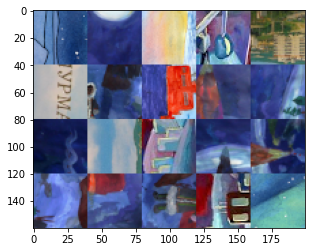

In [0]:
X = np.zeros((H, W, 3))
randomRotationList = rng.choice(rotationList,20)
randomBlockIndexList = rng.permutation(np.arange(0,len(filelist)))          
randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList[:20]]

notrotated = True
for i in range(20):
  if randomRotationList[i] != 0.0:
    notrotated = False
classIndex = -1
for i in range(6):
  good = True
  for j in range(20):
    if randomBlockIndexList[j] != j+i*20:
      good = False
    if good == True:
      classIndex = i
      break
if notrotated and (classIndex > -1):
    X = class_data[classIndex]   
else:
    X = convert_image(create_image(randomBlockFileNameList,randomRotationList))    
X /= 255.  
plt.imshow(X)

In [0]:
def image_generator_multiclass_1(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros((batch_size, H, W, 3))
      Y = np.zeros((batch_size, 7))
      
      for i in range(batch_size):      
        
        # 40% no object, 10% for each of the 6 classes
        appear = (np.random.random() < 0.6)
        if appear:
          classIndex = np.random.randint(6)
          X[i] = class_data[classIndex]
          Y[i,classIndex] = 1.0
          Y[i,6] = 1.0

        else:  
          randomRotationList = rng.choice(rotationList,20)
          randomBlockIndexList = rng.permutation(np.arange(0,len(filelist)))          
          randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList[:20]]

          notrotated = True
          for j in range(20):
            if randomRotationList[j] != 0.0:
              notrotated = False
          classIndex = -1
          for k in range(6):
            good = True
            for j in range(20):
              if randomBlockIndexList[j] != j+k*20:
                good = False
              if good == True:
                classIndex = k
                break
          if notrotated and (classIndex > -1):
             X[i] = class_data[classIndex]
             Y[i,classIndex] = 1
             Y[i,6] = 1.0     
          else:
             X[i] = convert_image(create_image(randomBlockFileNameList,randomRotationList))          
      
      yield X / 255., Y

In [0]:
def image_generator_multiclass_2(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros((batch_size, H, W, 3))
      Y = np.zeros((batch_size, 7))
      
      for i in range(batch_size):        
        # 50% no object
        appear = (np.random.random() < 0.5)
        if appear:
          classIndex = np.random.randint(6)
          X[i] = class_data[classIndex]
          Y[i,classIndex] = 1.0
          Y[i,6] = 1.0

        else: 
          n = 3
          acceptorInd = np.random.randint(6)
          donorInds = rng.choice(np.arange(0,6),n)
          donorBlockInds = rng.choice(np.arange(0,20),n)
          acceptorBlockInds = rng.permutation(np.arange(0,20))[:n] #repeated is denied          
          randomRotationValsList = rng.choice(rotationList,n)
          
          randomRotationList = np.zeros(20)
          for j in range(n):
            randomRotationList[acceptorBlockInds[j]] = randomRotationValsList[j]  

          randomBlockIndexList = np.arange(acceptorInd*20,acceptorInd*20+20) 
          for j in range(n):
             randomBlockIndexList[acceptorBlockInds[j]] = donorInds[j]*20 + donorBlockInds[j]   
          randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList]

          notrotated = True
          for j in range(20):
            if randomRotationList[j] != 0.0:
              notrotated = False
          classIndex = -1
          good = True
          for j in range(20):
            if randomBlockIndexList[j] != j+acceptorInd*20:
              good = False
              break
          if good == True:
            classIndex = acceptorInd             
          if notrotated and (classIndex > -1):
             X[i] = class_data[classIndex]
             Y[i,classIndex] = 1
             Y[i,6] = 1.0     
          else:
             X[i] = convert_image(create_image(randomBlockFileNameList,randomRotationList))          
      
      yield X / 255., Y

Acceptor index =  4  file =  alx
Donor indexes = 3,, files = chu,
Donor block indexes = 6,
Acceptor block indexes = 10,
Rotations = 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
[0. 0. 0. 0. 0. 0. 0.]


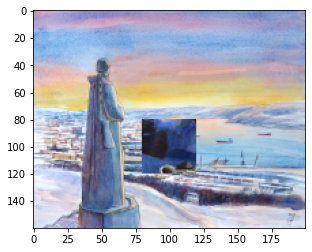

In [64]:
Y = np.zeros(7)

n = 1
acceptorInd = np.random.randint(6)
print("Acceptor index = ",acceptorInd," file = ",class_names[acceptorInd])
donorInds = rng.choice(np.arange(0,6),n)
print("Donor indexes = "+''.join([str(val)+',' for val in donorInds])+ ", files = "+
      ''.join([class_names[val]+',' for val in donorInds]))
donorBlockInds = rng.choice(np.arange(0,20),n)
print("Donor block indexes = "+''.join([str(val)+',' for val in donorBlockInds]))
acceptorBlockInds = sorted(rng.permutation(np.arange(0,20))[:n]) #repeated is denied          
print("Acceptor block indexes = "+''.join([str(val)+',' for val in acceptorBlockInds]))
randomRotationValsList = rng.choice(rotationList,n)

randomRotationList = np.zeros(20)
for j in range(n):
  randomRotationList[acceptorBlockInds[j]] = randomRotationValsList[j]  

print("Rotations = "+''.join([str(val)+',' for val in randomRotationList]))

randomBlockIndexList = np.arange(acceptorInd*20,acceptorInd*20+20) 
for j in range(n):
  randomBlockIndexList[acceptorBlockInds[j]] = donorInds[j]*20 + donorBlockInds[j]   
randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList]

notrotated = True
for j in range(20):
  if randomRotationList[j] != 0.0:
    notrotated = False
classIndex = -1
good = True
for j in range(20):
  if randomBlockIndexList[j] != j+acceptorInd*20:
    good = False
    break
if good == True:
  classIndex = acceptorInd             
if notrotated and (classIndex > -1):
    X = class_data[classIndex]
    Y[classIndex] = 1
    Y[6] = 1.0     
else:
    X = convert_image(create_image(randomBlockFileNameList,randomRotationList))
X /= 255.  
print(Y)
plt.imshow(X)

In [59]:
!pip install fontconfig

  Using cached https://files.pythonhosted.org/packages/d1/01/0a1ce055ab89acd13050fe9b0833be3ce8a0a07ec5450ddf1d1812016a3a/fontconfig-0.1.zip
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


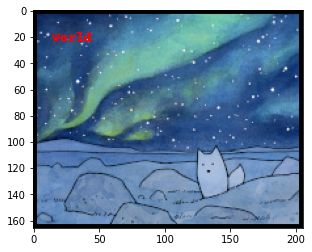

In [13]:
#http://www.blog.pythonlibrary.org/2017/10/26/how-to-add-a-border-to-your-photos-with-python/
#https://colab.research.google.com/github/znah/notebooks/blob/master/mini_sinkhorn.ipynb#scrollTo=FHrCrL6mWzIf
from PIL import Image, ImageOps,ImageFont,ImageDraw
import matplotlib.pyplot as plt

im = ImageOps.expand(Image.open(PROJECT_PATH +"/data/"+"fox.png"), border=3)
fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 10)
d = ImageDraw.Draw(im)
# draw text, full opacity
d.text((15,15), "World", fnt=fnt, fill=(255,0,0,255))
plt.imshow(im)

In [0]:
xx = None
yy = None
for x, y in image_generator_multiclass_2():
  xx, yy = x, y
  break

[0. 0. 0. 0. 0. 0. 0.]
percent no obj: 0.421875
percent fox: 0.078125
percent dck: 0.09375
percent bay: 0.125
percent chu: 0.078125
percent alx: 0.125
percent mrm: 0.078125


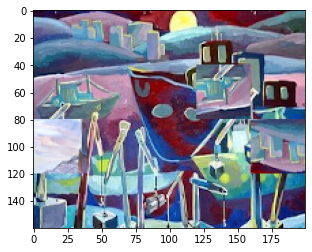

In [74]:
n = yy.shape[0]
idx = np.random.randint(n)
plt.imshow(xx[idx]);
print(yy[idx])
print("percent no obj:", (yy[:,6] == 0).sum() / n)
print("percent fox:", yy[:,0].sum() / n)
print("percent dck:", yy[:,1].sum() / n)
print("percent bay:", yy[:,2].sum() / n)
print("percent chu:", yy[:,3].sum() / n)
print("percent alx:", yy[:,4].sum() / n)
print("percent mrm:", yy[:,5].sum() / n)


In [75]:
model = make_model()
model.fit_generator(
    image_generator_multiclass_2(),
    steps_per_epoch=50,
    epochs=5,
)

58892288/58889256 [==============================] - 0s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
50/50 [==============================] - 38s 756ms/step - loss: 0.1279
Epoch 2/5
50/50 [==============================] - 38s 762ms/step - loss: 0.0045
Epoch 3/5
50/50 [==============================] - 40s 791ms/step - loss: 7.0218e-04
Epoch 4/5
50/50 [==============================] - 38s 750ms/step - loss: 2.1917e-05
Epoch 5/5
50/50 [==============================] - 37s 746ms/step - loss: 3.1606e-05


In [123]:
from tensorflow import keras
from tensorflow import lite
keras_file = "gross.h5"
keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("small.tflite","wb").write(tfmodel)

59295192

In [0]:
#!cp gross.h5 '/content/drive/My Drive/'   not necessary if disk already mounted

In [0]:
!cp small.tflite '/content/drive/My Drive/'

In [0]:
from matplotlib.patches import Rectangle
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy

model = tf.keras.models.load_model('/content/drive/My Drive/gross.h5')


ValueError: ignored

In [0]:
# Make prediction (easy)
def image_prediction_multiclass_1():
  x = np.zeros((H, W, 3))
  Y = np.zeros(7)
  # 40% no object, 10% for each of the 6 classes
  
  appear = (np.random.random() < 0.6)
  if appear:
    classIndex = np.random.randint(6)
    x = class_data[classIndex]
    Y[classIndex] = 1

  else:  
    randomRotationList = rng.choice(rotationList,20)
    randomBlockIndexList = rng.permutation(np.arange(0,len(filelist)))          
    randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList[:20]]

    notrotated = True
    for j in range(20):
      if randomRotationList[j] != 0.0:
        notrotated = False
    classIndex = -1
    for k in range(6):
      good = True
      for j in range(20):
        if randomBlockIndexList[j] != j+k*20:
          good = False
        if good == True:
          classIndex = k
          break
    if notrotated and (classIndex > -1):
        x = class_data[classIndex]
        Y[classIndex] = 1      
    else:
        x = convert_image(create_image(randomBlockFileNameList,randomRotationList))          
  # did ideal image appear?
  Y[6] = appear
  # Predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]
  print(Y)
  print(p)
  # Plot
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  
  # Draw the box
  if p[-1] > 0.5:   
    class_pred_idx = np.argmax(p[0:6])
    class_pred = class_names[class_pred_idx]
    print("pred: ", class_pred, ' ',p[-1])   
  else:
    print("pred: no object")
  plt.show()

In [0]:
# Make prediction (medium)
def image_prediction_multiclass_2():
  x = np.zeros((H, W, 3))
  Y = np.zeros(7)
  # 40% no object, 10% for each of the 6 classes
  
  appear = (np.random.random() < 0.5)
  if appear:
    classIndex = np.random.randint(6)
    x = class_data[classIndex]
    Y[classIndex] = 1.0
    Y[6] = 1.0

  else: 
    n = 3
    acceptorInd = np.random.randint(6)
    donorInds = rng.choice(np.arange(0,6),n)
    donorBlockInds = rng.choice(np.arange(0,20),n)
    acceptorBlockInds = rng.permutation(np.arange(0,20))[:n] #repeated is denied          
    randomRotationValsList = rng.choice(rotationList,n)
    
    randomRotationList = np.zeros(20)
    for j in range(n):
      randomRotationList[acceptorBlockInds[j]] = randomRotationValsList[j]  

    randomBlockIndexList = np.arange(acceptorInd*20,acceptorInd*20+20) 
    for j in range(n):
        randomBlockIndexList[acceptorBlockInds[j]] = donorInds[j]*20 + donorBlockInds[j]   
    randomBlockFileNameList = [filelist[i] for i in randomBlockIndexList]

    notrotated = True
    for j in range(20):
      if randomRotationList[j] != 0.0:
        notrotated = False
    classIndex = -1
    good = True
    for j in range(20):
      if randomBlockIndexList[j] != j+acceptorInd*20:
        good = False
        break
    if good == True:
      classIndex = acceptorInd             
    if notrotated and (classIndex > -1):
        x = class_data[classIndex]
        Y[classIndex] = 1.0
        Y[6] = 1.0     
    else:
        x = convert_image(create_image(randomBlockFileNameList,randomRotationList))          

  # Predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]
  print(Y)
  print(p)
  # Plot
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  
  if p[-1] > 0.5:   
    class_pred_idx = np.argmax(p[0:6])
    class_pred = class_names[class_pred_idx]
    print("pred: ", class_pred, ' ',p[-1])   
  else:
    print("pred: no object")
  plt.show()

[0. 0. 0. 1. 0. 0. 1.]
[3.4925992e-12 9.1518411e-11 1.4582206e-10 1.0000000e+00 8.3899427e-14
 3.5798271e-11 9.9989164e-01]
pred:  chu   0.99989164


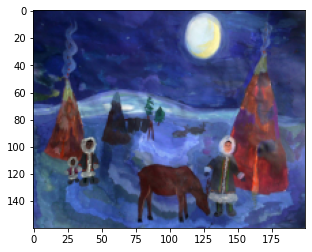

In [122]:
image_prediction_multiclass_2()

In [0]:
# Make prediction (medium)
def image_prediction_multiclass_2():
  x = np.zeros((H, W, 3))
  Y = np.zeros(7)

  idealInd = np.random.randint(6)
  blockInd = np.random.randint(20)
  randRot = np.random.randint(4)
  
  randomRotationList = np.zeros(20)
  randomRotationList[blockInd] = rotationList[randRot]
  randomBlockIndexList = np.arange(0,20)          
  randomBlockFileNameList = [filelist[i+idealInd*20] for i in randomBlockIndexList]

  notrotated = True
  for j in range(20):
    if randomRotationList[j] != 0.0:
      notrotated = False
  classIndex = -1
  for k in range(6):
    good = True
    for j in range(20):
      if randomBlockIndexList[j] != j+k*20:
        good = False
      if good == True:
        classIndex = k
        break
  if notrotated and (classIndex > -1):
      x = class_data[classIndex]
      Y[classIndex] = 1.0  
      Y[6] = 1.0    
  else:
      x = convert_image(create_image(randomBlockFileNameList,randomRotationList))
 
  # Predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0]
  print(Y)
  print(p)
  # Plot
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  
  # Draw the box
  if p[-1] > 0.5:   
    class_pred_idx = np.argmax(p[0:6])
    class_pred = class_names[class_pred_idx]
    print("pred: ", class_pred, ' ',p[-1])   
  else:
    print("pred: no object")
  plt.show()

[0. 0. 0. 0. 0. 0. 0.]
[1.6304324e-16 1.4278572e-29 1.0000000e+00 7.0448972e-25 2.0870617e-20
 2.6993650e-20 1.0000000e+00]
pred:  bay   1.0


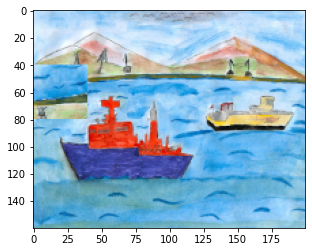

In [0]:
image_prediction_multiclass_2()